In [15]:
import pandas as pd
import seaborn as sns

In [16]:
meteo_2023 = pd.read_csv('meteo_202301-202304.csv', encoding='IBM860')

In [17]:
meteo_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             1752 non-null   int64  
 11  wind_speed           1752 non-null   float64
 12  rain_1h              206 non-null    float64
 13  clouds_all           1752 non-null   int64  
 14  weather_description  1752 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

<Axes: >

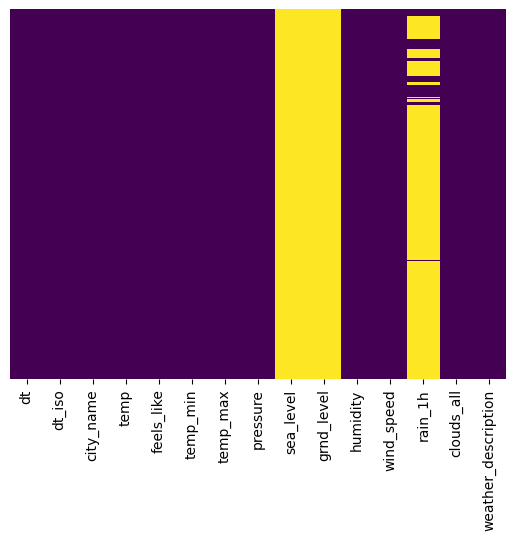

In [18]:
sns.heatmap(meteo_2023.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
meteo_2023.drop('sea_level', axis=1, inplace=True)
meteo_2023.drop('grnd_level', axis=1, inplace=True)

#or missing values => 0...
meteo_2023.drop('rain_1h', axis=1, inplace=True)
#meteo_203['rain_1h'].fillna(0, inplace=True)

In [20]:
meteo_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   humidity             1752 non-null   int64  
 9   wind_speed           1752 non-null   float64
 10  clouds_all           1752 non-null   int64  
 11  weather_description  1752 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 164.4+ KB


In [21]:
meteo_2023.duplicated().sum()

0

In [22]:
lista = []
for i in range (meteo_2023['dt_iso'].size):
    s = meteo_2023['dt_iso'][i]
    lista.append (s[0:19])
    
meteo_2023['dt_iso'] = lista
meteo_2023['dt_iso'] = pd.to_datetime (meteo_2023['dt_iso'], format = '%Y-%m-%d %H:%M:%S')

meteo_2023.rename(columns={'dt_iso': 'Data & Hora'}, inplace=True)

In [23]:
meteo_2023.head()

,dt,Data & Hora,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00,local,12.93,12.76,12.72,13.43,1019,95,2.02,100,moderate rain
1,1672534800,2023-01-01 01:00:00,local,13.49,13.38,13.43,13.90,1018,95,2.18,100,moderate rain
2,1672538400,2023-01-01 02:00:00,local,13.55,13.44,13.48,14.82,1017,95,2.88,100,moderate rain
3,1672542000,2023-01-01 03:00:00,local,13.61,13.51,12.01,14.82,1016,95,3.63,100,moderate rain
4,1672545600,2023-01-01 04:00:00,local,13.59,13.49,12.01,14.82,1015,95,4.58,100,moderate rain


In [24]:
meteo_2023.drop('dt', axis=1, inplace=True)

<Axes: >

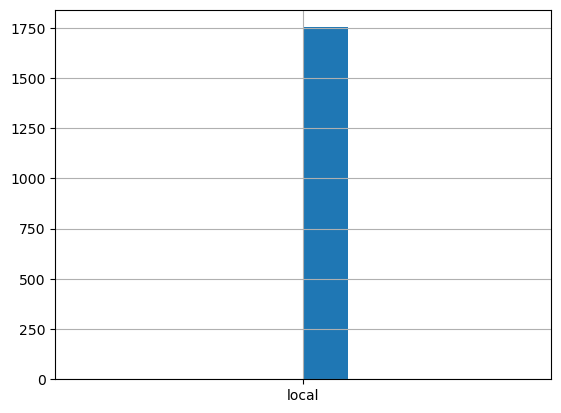

In [25]:
meteo_2023['city_name'].hist()

In [26]:
meteo_2023.drop('city_name', axis=1, inplace=True)

In [27]:
meteo_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data & Hora          1752 non-null   datetime64[ns]
 1   temp                 1752 non-null   float64       
 2   feels_like           1752 non-null   float64       
 3   temp_min             1752 non-null   float64       
 4   temp_max             1752 non-null   float64       
 5   pressure             1752 non-null   int64         
 6   humidity             1752 non-null   int64         
 7   wind_speed           1752 non-null   float64       
 8   clouds_all           1752 non-null   int64         
 9   weather_description  1752 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 137.0+ KB


In [28]:
meteo_2023.to_csv("meteo_2023.csv", encoding='utf-8')